In [1]:
!pip install qpsolvers
from qpsolvers import solve_qp
import numpy as np 
import matplotlib.pylab as plt

In [2]:
def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0.5, 1.0, 'XOR data')

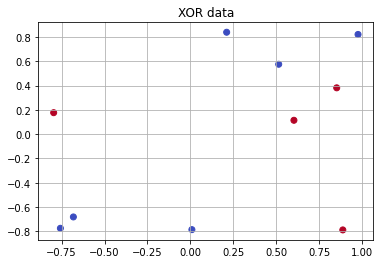

In [3]:

# XOR data
num_data = 10
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

In [4]:
"""
    Quadratic programming

    min_x (1/2)*x.T P x + q.T x
    s.t. Gx<=h
         Ax=b
         lb<=x<=ub
"""
C=100000
X = XOR_X
y = XOR_rot_y
Y = np.array([y]).T
P = np.multiply(Y @ Y.T, np.abs(X @ X.T)**2) # Q_ij = y_i*y_j*|x^(i).T x^(j)|^2
q = -np.ones(y.shape)
lb = np.zeros(y.shape)
ub = C*np.ones(y.shape)
A = y
b = np.zeros(1)
G1 = -np.identity(y.size)
h1 = np.zeros(y.shape)
G2 = np.identity(y.size)
h2 = C*np.ones(y.shape)

alpha = solve_qp(P, q, A=A, b=b, G=G1, h = h1)
plt.plot(alpha)

TypeError: argument of type 'ValueError' is not iterable

In [5]:
h = np.concatenate([h1, h2])
h

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0., 100000., 100000., 100000., 100000.,
       100000., 100000., 100000., 100000., 100000., 100000.])

In [6]:
q

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [7]:
y @ y.T

10.0